# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

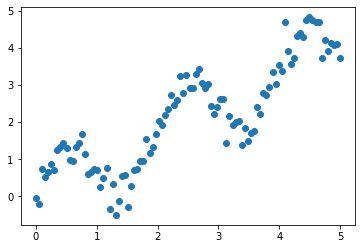

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.5374505649312235


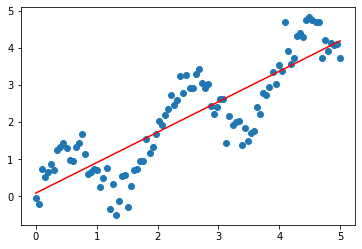

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [9]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [10]:
regr_poly = LinearRegression()

In [11]:
regr_poly.fit(X_poly, y)

LinearRegression()

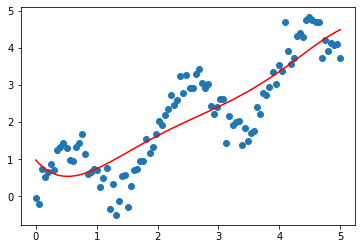

In [12]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [16]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-0.47610227  0.9294618  -0.42798929  0.09698188 -0.00784717]
interception:  0.8828562606329244


In [13]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b #轉置

array([0.96895374, 0.87813955, 0.79971645, 0.73288974, 0.67689615,
       0.63100324, 0.59450885, 0.56674049, 0.54705482, 0.53483701,
       0.52950019, 0.53048488, 0.53725842, 0.54931437, 0.56617194,
       0.58737543, 0.61249364, 0.64111927, 0.67286842, 0.70737991,
       0.74431478, 0.7833557 , 0.82420635, 0.86659091, 0.91025343,
       0.95495727, 1.00048455, 1.04663551, 1.09322801, 1.14009691,
       1.18709347, 1.23408485, 1.28095345, 1.32759638, 1.37392489,
       1.41986376, 1.46535074, 1.51033598, 1.55478146, 1.59866037,
       1.6419566 , 1.6846641 , 1.72678635, 1.76833575, 1.80933307,
       1.84980686, 1.88979287, 1.92933347, 1.96847712, 2.00727771,
       2.04579405, 2.08408928, 2.12223027, 2.16028707, 2.19833232,
       2.23644067, 2.27468822, 2.31315193, 2.35190905, 2.39103652,
       2.43061044, 2.47070546, 2.5113942 , 2.55274669, 2.59482979,
       2.63770661, 2.68143594, 2.72607165, 2.77166215, 2.81824978,
       2.86587026, 2.91455209, 2.96431601, 3.01517436, 3.06713

In [14]:
regr_poly.predict(X_poly)

array([0.96895374, 0.87813955, 0.79971645, 0.73288974, 0.67689615,
       0.63100324, 0.59450885, 0.56674049, 0.54705482, 0.53483701,
       0.52950019, 0.53048488, 0.53725842, 0.54931437, 0.56617194,
       0.58737543, 0.61249364, 0.64111927, 0.67286842, 0.70737991,
       0.74431478, 0.7833557 , 0.82420635, 0.86659091, 0.91025343,
       0.95495727, 1.00048455, 1.04663551, 1.09322801, 1.14009691,
       1.18709347, 1.23408485, 1.28095345, 1.32759638, 1.37392489,
       1.41986376, 1.46535074, 1.51033598, 1.55478146, 1.59866037,
       1.6419566 , 1.6846641 , 1.72678635, 1.76833575, 1.80933307,
       1.84980686, 1.88979287, 1.92933347, 1.96847712, 2.00727771,
       2.04579405, 2.08408928, 2.12223027, 2.16028707, 2.19833232,
       2.23644067, 2.27468822, 2.31315193, 2.35190905, 2.39103652,
       2.43061044, 2.47070546, 2.5113942 , 2.55274669, 2.59482979,
       2.63770661, 2.68143594, 2.72607165, 2.77166215, 2.81824978,
       2.86587026, 2.91455209, 2.96431601, 3.01517436, 3.06713

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [15]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [16]:
sigma = 0.3

In [17]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [18]:
regr_rbf = LinearRegression()

In [19]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

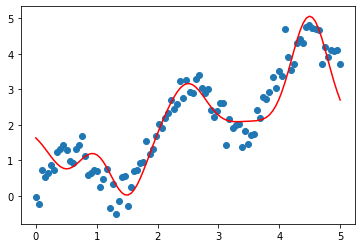

In [20]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [21]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-1.1509958  -1.89901378  1.25273414  0.16728576  3.14123924]
interception:  1.9177731714609225


#### Comparison

In [22]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

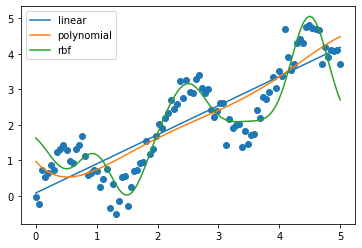

In [23]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [24]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5374505649312235


In [25]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.49475507111253975


In [26]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.2888552666419233
